# Comet backward integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound
import assist

In [2]:
ephem = assist.Ephem("../data/linux_p1550p2650.440", "../data/sb441-n16.bsp")

In [21]:
ic = np.genfromtxt('COM_LPCs.csv', delimiter=',')[1]

In [22]:
_, q, e, inc, node, argPeri, epoch, t_p, _ = ic

In [23]:
sim = rebound.Simulation()
extras = assist.Extras(sim, ephem)
t_initial = (2400000.0 + epoch) - ephem.jd_ref
sim.t = t_initial

# barycentric coordinates?
Mtot = 0.0
for i in range(11):
    Mtot += ephem.get_particle(i, t_initial).m
primary = rebound.Particle(m=Mtot)
initial = rebound.Particle(primary=primary, simulation=sim, a=q/(1.0-e), e=e, inc=inc/180.0*np.pi, Omega=node/180.0*np.pi, omega=argPeri/180.0*np.pi, T=t_p)
sim.add(initial)

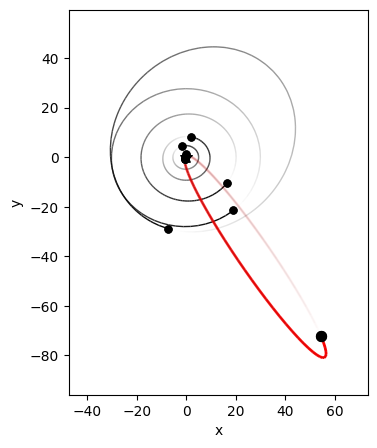

In [24]:
sim2 = assist.convert_to_rebound(sim,ephem)
op1 = rebound.OrbitPlot(sim2)
op2 = rebound.OrbitPlot(sim2, particles=[-1], ax=op1.ax, fig=op1.fig, lw=2, color="red")